### Credit Card Fraud Detection

Fraudulent transactions happen every day and it is important that credit card companies are able to recognize these fraudulent credit card transactions.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days:

492 fraudulent out of 284,807 transactions. The dataset is highly unbalanced where the positive class (frauds) account for 0.172% of all transactions.

https://www.kaggle.com/mlg-ulb/creditcardfraud

It contains only numerical variable inputs which are the result of a PCA transformation. Due to confidentiality the original features and more background information about the data are not included. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with the PCA are the variables 'Time' and 'Amount'.

'Time'- contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' - transaction Amount; this feature can be used for example-dependant cost-sensitive learning.

'Class' - is the response variable and it takes. Value 1 = Fraud and 0 = Not fraud.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.model_selection import train_test_split # data split

from sklearn.preprocessing import StandardScaler



%matplotlib inline
sns.set_style("whitegrid")
data = pd.read_csv("creditcard.csv")

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]), columns=data.columns[:-1])

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#any missing data
print(data.columns)
print("Null: ", data.isnull().sum().sum())


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Null:  0


In [4]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 3)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.173


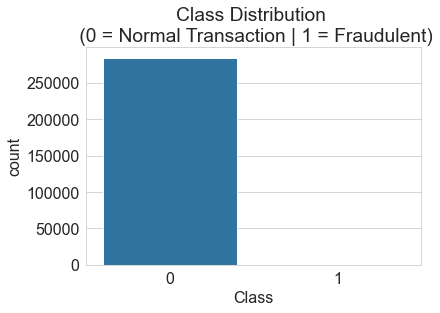

In [126]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 16})
sns.countplot(x = 'Class', data = data)
plt.title('Class Distribution \n (0 = Normal Transaction | 1 = Fraudulent)');



Looking at the distributions the tranaction type is highly skewed. Looking at further distributions of the other features:

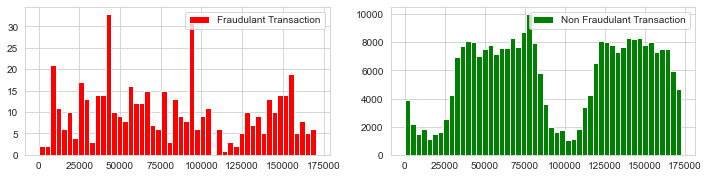

In [121]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=50, color='red', label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=50, color='green', label="Non Fraudulant Transaction")
plt.legend()

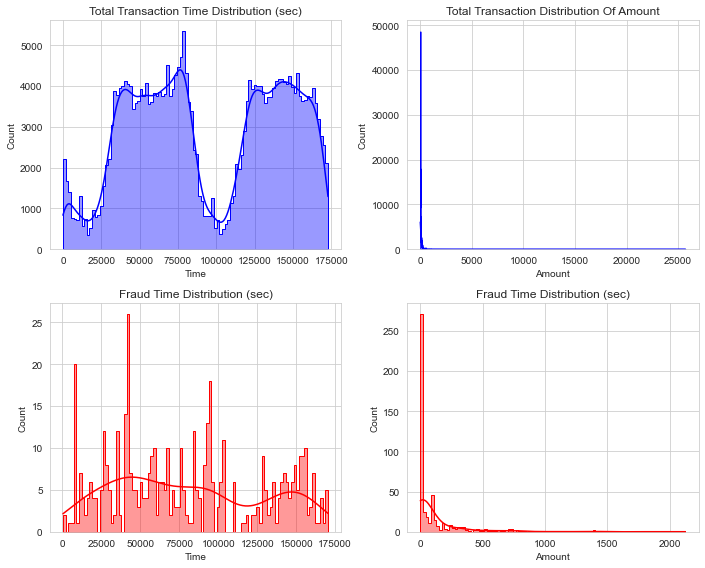

In [7]:
plt.figure(figsize=(10,8))

frauds = data[data['Class'] == 1]

plt.subplot(2, 2, 1)
plt.tight_layout()
plt.title('Total Transaction Time Distribution (sec)')
sns.histplot(data['Time'], bins= 100, alpha = 0.4, kde=True, element="step",color='blue');


# #plot the amount feature

plt.subplot(2, 2, 2)
plt.tight_layout()
plt.title('Total Transaction Distribution Of Amount')
sns.histplot(data['Amount'], alpha = 0.4, kde=True, element="step",color='blue');


plt.subplot(2, 2, 3)
plt.tight_layout()
plt.title('Fraud Time Distribution (sec)')
sns.histplot(frauds['Time'], bins= 100, alpha = 0.4, kde=True, element="step",color='red');

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.title('Fraud Time Distribution (sec)')
sns.histplot(frauds['Amount'], bins= 100, alpha = 0.4, kde=True, element="step",color='red');


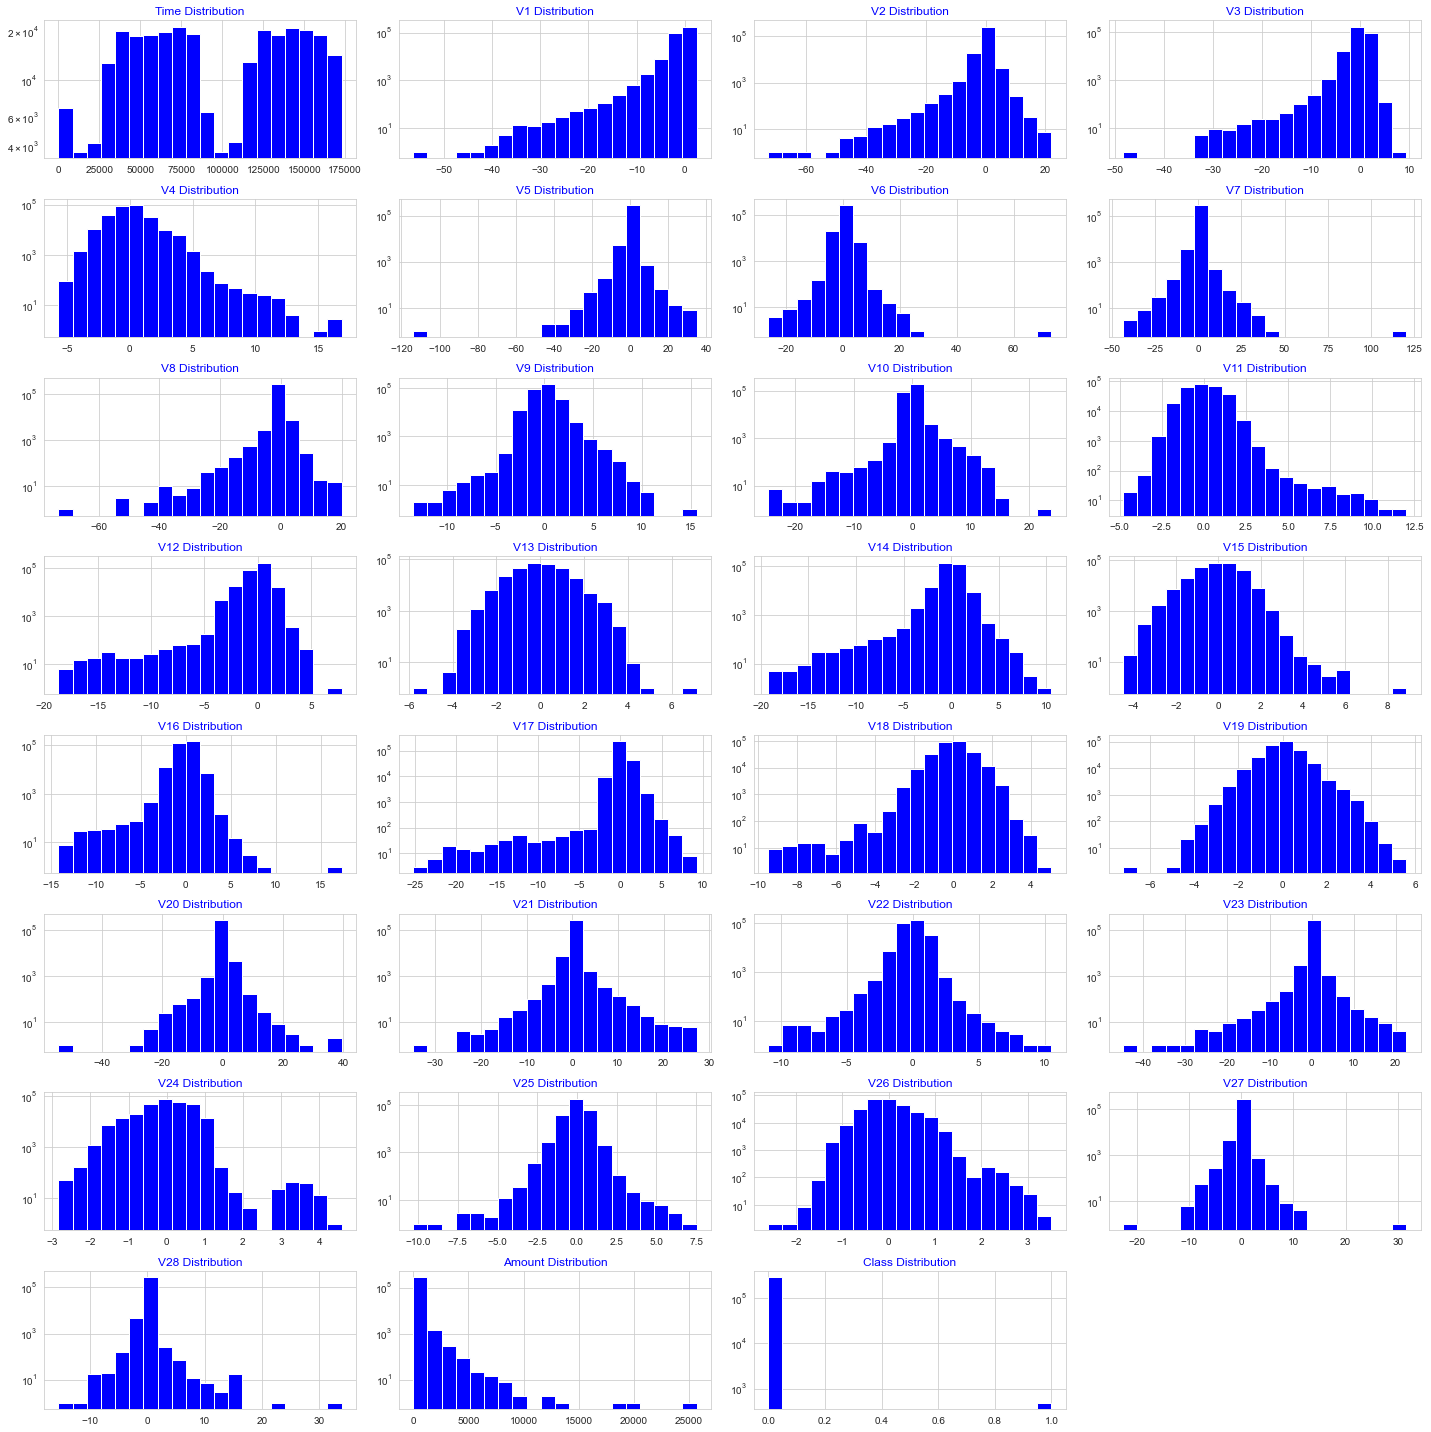

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Blue')
        ax.set_title(feature+" Distribution",color='Blue')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

## Data Pre-processing 

Data preprocessing is neccessary because it helps to gain a better accuracy rather than just using raw data to build a model.

First, standardise the data using using Scikit-learn's StandardScaler(). In order to fit to the scaler the data should be reshaped within the range of -1 and 1.

In [80]:
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score



data['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
data['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

data = data.drop(['Time','Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Shuffle the data

In [81]:
data = data.sample(frac=1)

frauds = data[data['Class'] == 1]
non_frauds = data[data['Class'] == 0][:500] # take 500 to match the amount of fraud

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
268183,-4.237557,4.405630,-3.519578,-0.984004,-1.155992,-1.110501,-0.966956,2.196317,1.000590,1.929658,...,1.067774,0.272424,0.501636,0.005454,-0.206314,0.747851,0.406840,0,-0.347272,1.437922
215692,-1.748580,1.841401,-0.123831,-0.888903,0.326017,-1.394945,0.776152,0.440814,-0.834068,-1.905478,...,0.620754,-0.560597,0.006582,1.184297,-0.088813,-0.493853,-0.074955,0,-0.273468,0.955296
258403,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,...,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,1,0.830204,1.344004
182976,-0.879042,1.585618,-0.522312,-0.558494,-0.186661,-1.234188,0.355993,0.598737,-0.336296,-0.578817,...,-0.536619,0.168304,0.062080,-0.360597,0.144004,0.118554,0.023296,0,-0.316407,0.648440
215306,-0.713734,0.883207,-0.621973,-1.024331,1.000327,0.075694,0.870387,0.173685,-0.025722,-0.072645,...,-0.370607,-0.023403,-1.448473,-0.715381,0.178693,-0.148248,-0.042908,0,-0.217974,0.951863


With the dataset defined, separating the input variables from the target variable, we divided the data into training and test sets, importing the train_test_split function.

The train_test_split function uses a randomizer to separate data into training and test sets. In this case, 80% of the data for training and 20% for tests were defined.

Features are the entire dataset exempt from the Class variable. 
Lables are the actual class of the dataset rows.

In [82]:
from sklearn.preprocessing import normalize

features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])


feature_array = features.values
label_array = labels.values


X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.2)


# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test = normalize(X_test)

# KNN

K Nearest Neighbors model. Starting using k = 5, then testing how the number of neighbours affects the test accuracy

In [102]:
knn = KNeighborsClassifier(algorithm='kd_tree',n_jobs=-1, n_neighbors=5)

knn.fit(X_train,y_train.ravel())
predictions1 = knn.predict(X_test)

pred_fraud = np.where(predictions1 == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))



pred_good = np.where(predictions1 == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions1))
print("False negatives:", false_neg , "\n" 
      "False positives:", false_pos , "\n" 
      "Mispredictions:", false_neg + false_pos)
print("Total test data points:", len(X_test))

knn_accuracy_score  = accuracy_score(y_test,predictions1)
knn_precison_score  = precision_score(y_test,predictions1)
knn_recall_score    = recall_score(y_test,predictions1)
knn_f1_score        = f1_score(y_test,predictions1)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

Accuracy: 0.9195979899497487
False negative rate (with respect to misclassifications):  0.6875
False negative rate (with respect to all the data):  0.05527638190954774
False negatives: 11 
False positives: 5 
Mispredictions: 16
Total test data points: 199

K-Nearest Neighbours
Scores
Accuracy --> 0.9195979899497487
Precison --> 0.9479166666666666
Recall --> 0.8921568627450981
F1 --> 0.9191919191919192


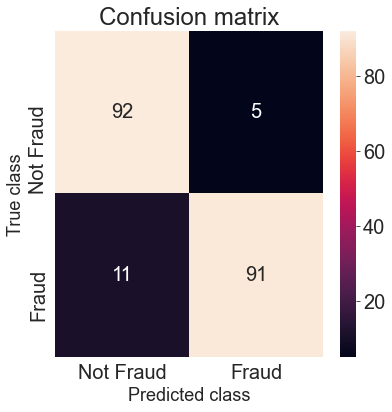

In [103]:
label_font = {'size':'18'}  # Adjust to fit
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 20})
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontdict=label_font)
plt.xlabel('Predicted class', fontdict=label_font)
plt.show()

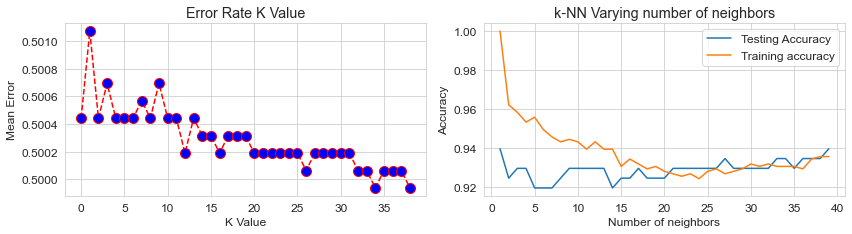

In [104]:
neighbours = np.arange(1,40)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

error = []

for i,k in enumerate(neighbours):
    
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(algorithm='kd_tree',n_jobs=-1, n_neighbors=k)

    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel())
    
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    #print(i)
    
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})
plt.subplot(2,2,1)
plt.plot(range(len(neighbours)), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.tight_layout()
plt.ylabel('Mean Error')


#Generate plot
plt.subplot(2,2,2)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()




In [116]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

#knn= KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, n_jobs=-1, n_neighbors=25, p=2, weights='uniform')
knn = KNeighborsClassifier(algorithm='kd_tree',n_jobs=-1, n_neighbors=x[1])

knn.fit(X_train,y_train.ravel())
predictions1 = knn.predict(X_test)

pred_fraud = np.where(predictions1 == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))



pred_good = np.where(predictions1 == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions1))
print("False negatives:", false_neg , "\n" 
      "False positives:", false_pos , "\n" 
      "Mispredictions:", false_neg + false_pos)
print("Total test data points:", len(X_test))

knn_accuracy_score  = accuracy_score(y_test,predictions1)
knn_precison_score  = precision_score(y_test,predictions1)
knn_recall_score    = recall_score(y_test,predictions1)
knn_f1_score        = f1_score(y_test,predictions1)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

Accuracy: 0.9396984924623115
False negative rate (with respect to misclassifications):  0.5833333333333334
False negative rate (with respect to all the data):  0.035175879396984924
False negatives: 7 
False positives: 5 
Mispredictions: 12
Total test data points: 199

K-Nearest Neighbours
Scores
Accuracy --> 0.9396984924623115
Precison --> 0.95
Recall --> 0.9313725490196079
F1 --> 0.9405940594059405


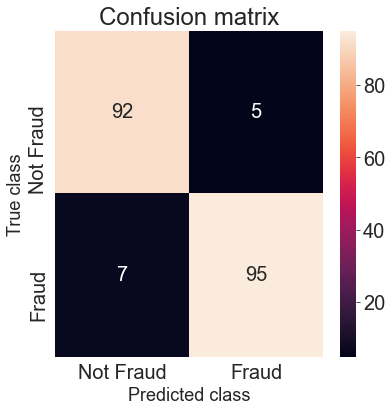

In [117]:
label_font = {'size':'18'}  # Adjust to fit
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 20})
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontdict=label_font)
plt.xlabel('Predicted class', fontdict=label_font)
plt.show()

# Logistic regression

Using the same processed dataset for the same testest using Logistc regression

In [108]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, penalty='l2')
lr.fit(X_train, y_train.ravel())
predictions2 = lr.predict(X_test)

pred_fraud = np.where(predictions2 == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions2 == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions2))
print("False negatives:", false_neg , "\n" 
      "False positives:", false_pos , "\n" 
      "Mispredictions:", false_neg + false_pos)
print("Total test data points:", len(X_test))

lr_accuracy_score  = accuracy_score(y_test,predictions2)
lr_precison_score  = precision_score(y_test,predictions2)
lr_recall_score    = recall_score(y_test,predictions2)
lr_f1_score        = f1_score(y_test,predictions2)

#printing
print("")
print("Logistic regression")
print("Scores")
print("Accuracy -->",lr_accuracy_score)
print("Precison -->",lr_precison_score)
print("Recall -->",lr_recall_score)
print("F1 -->",lr_f1_score)


Accuracy: 0.9447236180904522
False negative rate (with respect to misclassifications):  0.8181818181818182
False negative rate (with respect to all the data):  0.04522613065326633
False negatives: 9 
False positives: 2 
Mispredictions: 11
Total test data points: 199

Logistic regression
Scores
Accuracy --> 0.9447236180904522
Precison --> 0.9789473684210527
Recall --> 0.9117647058823529
F1 --> 0.9441624365482234


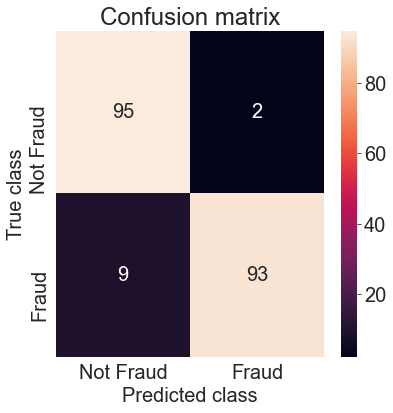

In [93]:
label_font = {'size':'20'}  # Adjust to fit
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions2)
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 20})
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontdict=label_font)
plt.xlabel('Predicted class', fontdict=label_font)
plt.show()

++++++++++++++++++++

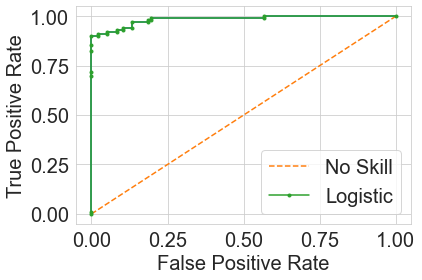

In [94]:
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

logreg=LogisticRegression(C=1, penalty='l2')
logreg.fit(X_train,y_train.ravel())
y_pred=logreg.predict(X_test)

y_pred_thresh1=logreg.predict_proba(X_test)
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_thresh1[:,1])


plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [127]:
from numpy import sqrt 

gmeans = sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.620366, G-Mean=0.950


In [112]:

y_prediction = logreg.predict_proba(X_test)
predictions3 = binarize(y_prediction, threshold=0.23)[:,1]

pred_fraud = np.where(predictions3 == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions3 == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions3))
print("False negatives:", false_neg , "\n" 
      "False positives:", false_pos , "\n" 
      "Mispredictions:", false_neg + false_pos)
print("Total test data points:", len(X_test))

lr_accuracy_score  = accuracy_score(y_test,predictions3)
lr_precison_score  = precision_score(y_test,predictions3)
lr_recall_score    = recall_score(y_test,predictions3)
lr_f1_score        = f1_score(y_test,predictions3)

#printing
print("")
print("Logistic regression")
print("Scores")
print("Accuracy -->",lr_accuracy_score)
print("Precison -->",lr_precison_score)
print("Recall -->",lr_recall_score)
print("F1 -->",lr_f1_score)

Accuracy: 0.9095477386934674
False negative rate (with respect to misclassifications):  0.16666666666666666
False negative rate (with respect to all the data):  0.01507537688442211
False negatives: 3 
False positives: 15 
Mispredictions: 18
Total test data points: 199

Logistic regression
Scores
Accuracy --> 0.9095477386934674
Precison --> 0.868421052631579
Recall --> 0.9705882352941176
F1 --> 0.9166666666666667


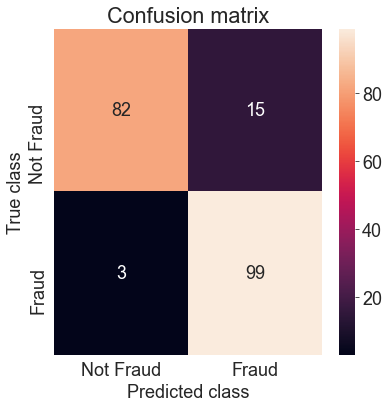

In [113]:
label_font = {'size':'18'}  # Adjust to fit
LABELS = ['Not Fraud', 'Fraud', ]
conf_matrix = confusion_matrix(y_test, predictions3)
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 18})
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class', fontdict=label_font)
plt.xlabel('Predicted class', fontdict=label_font)
plt.show()

We can test how the model performs with the threshold value from 0 to 1 in 0.01 increments




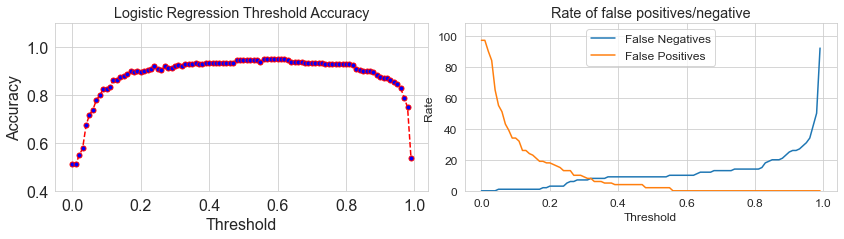

In [128]:
from matplotlib.pyplot import figure

x = []
acc = []
false_n = []
false_p = []

for i in np.arange(0, 1, 0.01):
    x.append(i)
    
    y_prediction = logreg.predict_proba(X_test)
    predictions3 = binarize(y_prediction, threshold=i)[:,1]
    
    pred_fraud = np.where(predictions3 == 1)[0]
    real_fraud = np.where(y_test == 1)[0]
    false_pos = len(np.setdiff1d(pred_fraud, real_fraud))
    
    

    pred_good = np.where(predictions3 == 0)[0]
    real_good = np.where(y_test == 0)[0]
    false_neg = len(np.setdiff1d(pred_good, real_good))
    


    false_neg_rate = false_neg/(false_pos+false_neg)

    accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
    
    false_n.append(false_neg)   
    false_p.append(false_pos)
    acc.append(accuracy)


    
plt.figure(figsize=(12, 6))
    
plt.subplot(2,2,1)  
plt.rcParams.update({'font.size': 12})
plt.ylim(ymax = 1.1, ymin = 0.4)
plt.plot(x, acc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Logistic Regression Threshold Accuracy')
plt.xlabel('Threshold')
plt.tight_layout()
plt.ylabel('Accuracy')    


plt.subplot(2,2,2)
plt.tight_layout()
plt.ylim(ymax = 108, ymin = 0)
plt.title('Rate of false positives/negative')
plt.plot(x, false_n, label='False Negatives')
plt.plot(x, false_p, label='False Positives')
plt.xlabel('Threshold')
plt.legend()
plt.ylabel('Rate')    

plt.show()

    
    

How do the models perfrom with a higher imbalence of non fraud transactions? So far the weight has been (roughly) equal. 

Each model will use 10,000 to 100,000 non fraud transactions.

#### Logistic regression 

In [76]:
from numpy import sqrt


df = pd.read_csv('creditcard.csv')

df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)

df = df.sample(frac=1)

range_lr = []

acc_lr = []
false_nl = []
false_pl = []

for trn in np.arange(10000, 110000, 10000):
    range_lr.append(trn)
    frauds = df[df['Class'] == 1]
    non_frauds = df[df['Class'] == 0][:trn]

    new_df = pd.concat([non_frauds, frauds])
    # Shuffle dataframe rows
    new_df = new_df.sample(frac=1, random_state=42)

    features = new_df.drop(['Class'], axis = 1)
    labels = pd.DataFrame(new_df['Class'])

    feature_array = features.values
    label_array = labels.values

    X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.2, random_state = 1)

    # normalize: Scale input vectors individually to unit norm (vector length).
    X_train = normalize(X_train)
    X_test= normalize(X_test)
    
    logreg=LogisticRegression(C=1, penalty='l2')
    logreg.fit(X_train,y_train.ravel())
    y_pred=logreg.predict(X_test)


    
    y_pred_thresh2=logreg.predict_proba(X_test)
    


    fpr, tpr, thresholds = roc_curve(y_test, y_pred_thresh2[:,1])
 
    gmeans = sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    
    y_prediction = logreg.predict_proba(X_test)
    predictions3 = binarize(y_prediction, threshold= thresholds[ix])[:,1]
    
    pred_fraud = np.where(predictions3 == 1)[0]
    real_fraud = np.where(y_test == 1)[0]
    false_pos = len(np.setdiff1d(pred_fraud, real_fraud))
    
    pred_good = np.where(predictions3 == 0)[0]
    real_good = np.where(y_test == 0)[0]
    false_neg = len(np.setdiff1d(pred_good, real_good))
    
    false_neg_rate = false_neg/(false_pos+false_neg)

    accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)


    false_nl.append(false_neg)   
    false_pl.append(false_pos)
    acc_lr.append(accuracy)
    

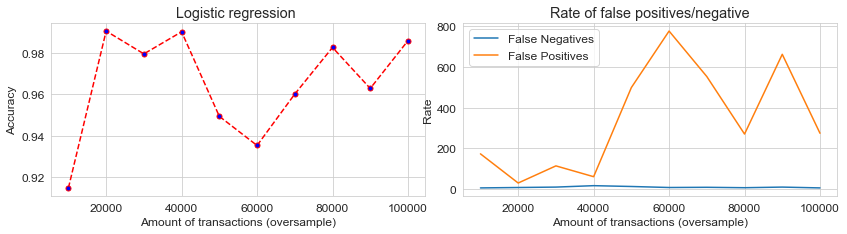

In [77]:
plt.figure(figsize=(12, 6))
    
plt.subplot(2,2,1)  
plt.rcParams.update({'font.size': 12})
plt.plot(range_lr, acc_lr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Logistic regression ')
plt.xlabel('Amount of transactions (oversample)')
plt.tight_layout()
plt.ylabel('Accuracy')    


plt.subplot(2,2,2)
plt.tight_layout()

plt.title('Rate of false positives/negative')
plt.plot(range_lr, false_nl, label='False Negatives')
plt.plot(range_lr, false_pl, label='False Positives')
plt.xlabel('Amount of transactions (oversample)')
plt.legend()
plt.ylabel('Rate')    

plt.show()

#### KNN

In [470]:
df = pd.read_csv('creditcard.csv')

df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)

df = df.sample(frac=1)

range_knn = []

acc_knn = []
false_nk = []
false_pk = []

for trn in np.arange(10000, 110000, 10000):
    print(trn)
    range_knn.append(trn)
    frauds = df[df['Class'] == 1]
    non_frauds = df[df['Class'] == 0][:trn]

    new_df = pd.concat([non_frauds, frauds])
    # Shuffle dataframe rows
    new_df = new_df.sample(frac=1, random_state=42)

    features = new_df.drop(['Class'], axis = 1)
    labels = pd.DataFrame(new_df['Class'])

    feature_array = features.values
    label_array = labels.values

    X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.2, random_state = 1)

    # normalize: Scale input vectors individually to unit norm (vector length).
    X_train = normalize(X_train)
    X_test= normalize(X_test)
    
    neighbours = np.arange(27,40)
    train_accuracy = np.empty(len(neighbours))
    test_accuracy = np.empty(len(neighbours))

#     for i,k in enumerate(neighbours):
#         #Setup a knn classifier with k neighbors
#         knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)

#         #Fit the model
#         knn.fit(X_train,y_train.ravel())

#         #Compute accuracy on the training set
#         train_accuracy[i] = knn.score(X_train, y_train.ravel())

#         #Compute accuracy on the test set
#         test_accuracy[i] = knn.score(X_test, y_test.ravel())    

    idx = np.where(test_accuracy == max(test_accuracy))
    x = neighbours[idx]
  
    knn = KNeighborsClassifier(algorithm='kd_tree',n_jobs=-1, n_neighbors=38)

    knn.fit(X_train,y_train.ravel())
    predictions1 = knn.predict(X_test)

    pred_fraud = np.where(predictions1 == 1)[0]
    real_fraud = np.where(y_test == 1)[0]
    false_pos = len(np.setdiff1d(pred_fraud, real_fraud))



    pred_good = np.where(predictions1 == 0)[0]
    real_good = np.where(y_test == 0)[0]
    false_neg = len(np.setdiff1d(pred_good, real_good))

    false_neg_rate = false_neg/(false_pos+false_neg)

    accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
    
    false_nk.append(false_neg)   
    false_pk.append(false_pos)
    acc_knn.append(accuracy)

10000
20000
30000
40000
50000
60000
70000
80000
90000


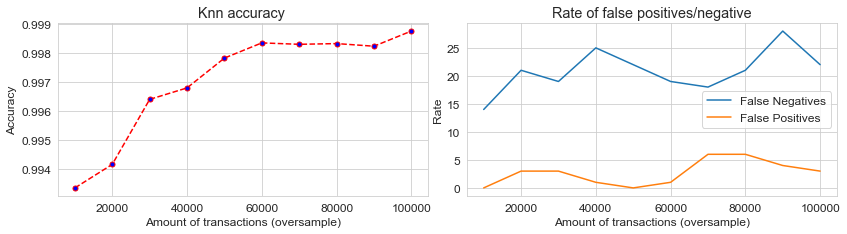

In [477]:
plt.figure(figsize=(12, 6))
    
plt.subplot(2,2,1)  
plt.rcParams.update({'font.size': 12})
plt.plot(range_knn, acc_knn, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Knn accuracy ')
plt.xlabel('Amount of transactions (oversample)')
plt.tight_layout()
plt.ylabel('Accuracy')    


plt.subplot(2,2,2)
plt.tight_layout()
plt.title('Rate of false positives/negative')
plt.plot(range_knn, false_nk, label='False Negatives')
plt.plot(range_knn, false_pk, label='False Positives')
plt.xlabel('Amount of transactions (oversample)')
plt.legend()
plt.ylabel('Rate')    
plt.show()